# Lending Club - Capstone Project

### Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import probplot
from scipy.stats.mstats import zscore
import statsmodels.stats.api as sms

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Make sure it displays all columns. None here means unlimited.So now when you do head, it shows all columns. Also, set the axes style and color pallete.

In [2]:

pd.set_option('max_columns',None)

sns.set(style='white',color_codes=True)

%matplotlib inline

### First we will read the csv file and see what's in the file

In [3]:
loans_data = pd.read_csv('loan.csv', low_memory=False)
loans_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Understanding the data that is in our file

In [4]:
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

Describe when used with the 'all' option helps us understand the non-numerical columns too. The describe( ) command just
provides numerical columns data.

In [5]:
loans_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.0000

### Visual Exploratory Data Analysis of Loan Amounts

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


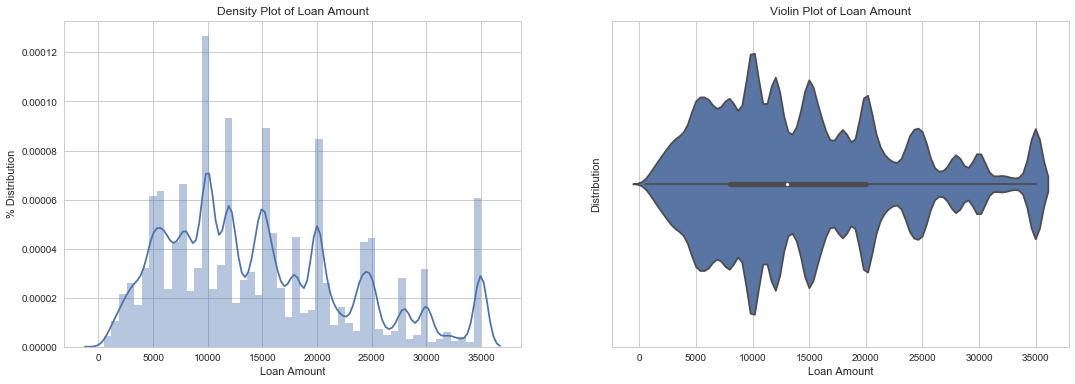

Dist plot is a combination of histogram and kernal density estimate.
Violin plot is a combination of boxplot and kernal density estimate. The violin plot shows that the median is at 13000 and most of the loans lie between 8000 to 20,000.


The distribution plot and violin plot, both show that most of the loans are of amount 10000.


In [6]:
#setting the style of the plot
sns.set_style("whitegrid")

#visual EDA to understand the distribution of the loan amount
#creating two plots, one is distribution and the other is violin plot too see the loan amount distribution
fig, axs = plt.subplots(1,2,figsize=(18,6))

sns.distplot(loans_data.loan_amnt, ax=axs[0])
axs[0].set(xlabel='Loan Amount', 
       ylabel='% Distribution',title='Density Plot of Loan Amount')
sns.violinplot(loans_data.loan_amnt, ax=axs[1])
axs[1].set(xlabel='Loan Amount', 
       ylabel='Distribution',title='Violin Plot of Loan Amount')
plt.show()
print("Dist plot is a combination of histogram and kernal density estimate.")
print("Violin plot is a combination of boxplot and kernal density estimate. The violin plot shows that the median is at 13000 and most of the loans lie between 8000 to 20,000.")
print("\n")
print("The distribution plot and violin plot, both show that most of the loans are of amount 10000.")

In [7]:
# We saw above that most of the loans are for amount 10,000, so I wanted to see exactly how many.
print("Number of loans with loan amount as 10,000 are:",loans_data.id[loans_data['loan_amnt'] == 10000].count())

Number of loans with loan amount as 10,000 are: 61837


### Understanding loan status

Understanding Unique values in our loan status column.

In [8]:
np.unique(loans_data['loan_status'])

array(['Charged Off', 'Current', 'Default',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid', 'Fully Paid',
       'In Grace Period', 'Issued', 'Late (16-30 days)',
       'Late (31-120 days)'], dtype=object)

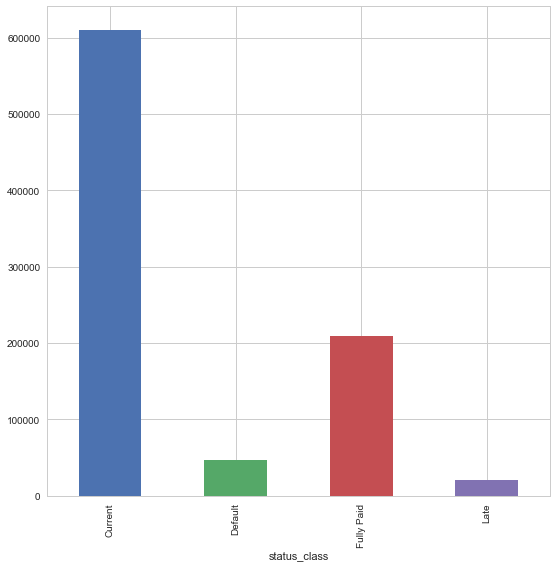

In [9]:
plt.rcParams['figure.figsize'] = (9,9)
def status_class(text):
    if text in ('Fully Paid' ,'Does not meet the credit policy. Status:Fully Paid'):
        return 'Fully Paid'
    elif text in ('Charged Off' ,'Default' ,'Does not meet the credit policy. Status:Charged Off'):
        return 'Default'
    elif text in ('Current','Issued'):
        return 'Current'
    elif text in ('Late (16-30 days)' ,'Late (31-120 days)','In Grace Period'):
        return 'Late'
    else:
        return 'Unknown'

loans_data['status_class']=loans_data['loan_status'].apply(status_class)
loans_data.groupby('status_class').size().plot(kind='bar')

### Exploring different reasons for which the loan was issued



We see here that most of the loans are for debt consolidation or to pay credit cards.


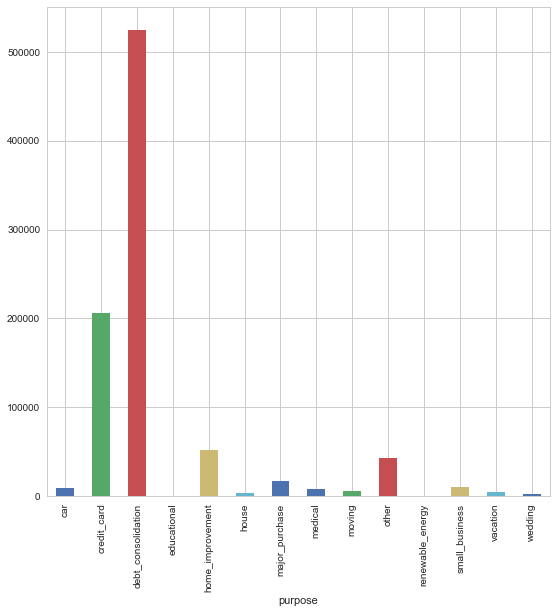

In [10]:
plt.rcParams['figure.figsize'] = (9,9)
loans_data.groupby('purpose').size().plot(kind='bar')

print("\n")
print("We see here that most of the loans are for debt consolidation or to pay credit cards.")

## Now, understanding our borrowers

### Length of employment

In [11]:
np.unique(loans_data.emp_length.astype(str))

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year', 'nan'],
      dtype=object)

How many loans have 'n/a' as the employment length data

In [12]:
loans_data.id[loans_data['emp_length'].isnull()].count()

44825

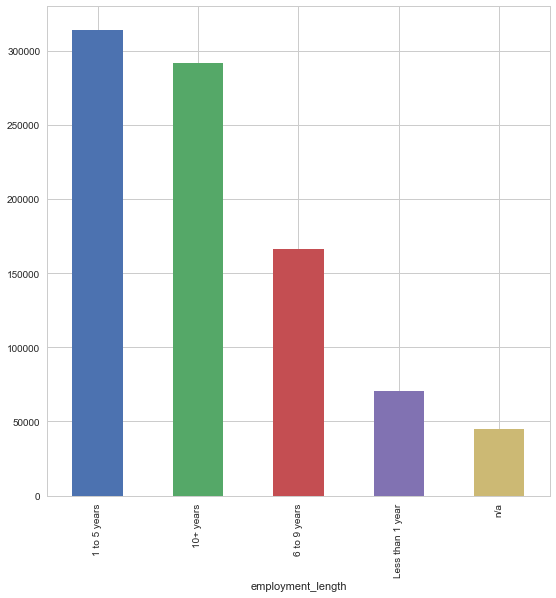

In [13]:
plt.rcParams['figure.figsize'] = (9,9)
def employment_len(text):
    if text=='10+ years':
        return '10+ years'
    elif text in ('1 year','2 years', '3 years', '4 years','5 years'):
        return '1 to 5 years'
    elif text in ('6 years', '7 years', '8 years', '9 years'):
        return '6 to 9 years'
    elif text== '< 1 year':
        return 'Less than 1 year'
    else:
        return 'n/a'

loans_data['employment_length']=loans_data['emp_length'].apply(employment_len)
loans_data.groupby('employment_length').size().plot(kind='bar')

### Understanding annual income

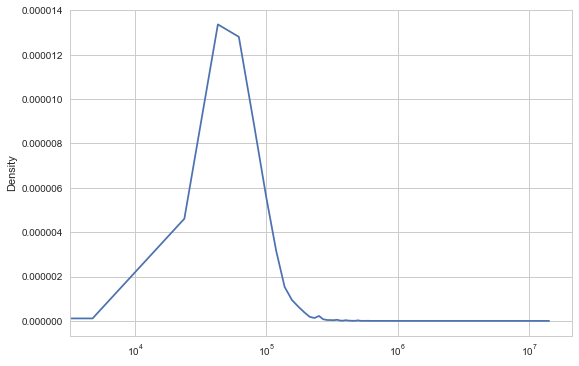

In [14]:
plt.rcParams['figure.figsize'] = (9,6)
loans_data["annual_inc"].plot.density(logx = True)

In [15]:
np.unique(loans_data['home_ownership'])

array(['ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT'], dtype=object)

In [16]:
loans_data.id[loans_data['annual_inc'].isnull()].count()

4

Filling the missing values in annual income column with median value of that column. I chose median cause annual income is a column that can have outliers.

In [17]:
loans_data.fillna(loans_data.median()['annual_inc'], inplace = True)

Now, I will run a check to ensure that there are no more missing values in this column

In [18]:
loans_data.id[loans_data['annual_inc'].isnull()].count()

0

In [19]:
#loans_data['inst_inc_ratio'] = loans_data['installment']/loans_data['annual_inc']
loans_data[loans_data['application_type'] == 'JOINT'].head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,status_class,employment_length
466289,68341763,72928789,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.00,Not Verified,Dec-2015,Issued,n,https://www.lendingclub.com/browse/loanDetail....,65000,home_improvement,65000,605xx,IL,10.78,0.0,Aug-2000,0.0,65000.0,65000.0,6.0,0.0,7869.0,56.2,18.0,w,20000.00,20000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,65000,0.00,Jan-2016,Dec-2015,0.0,65000.0,1.0,JOINT,71000.00,13.85,Not Verified,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,72.8,0.0,2.0,2081.0,64.7,14000.0,2.0,5.0,1.0,Current,10+ years
466419,68341663,72928657,20000.0,20000.0,20000.0,60 months,13.44,459.58,C,C3,Administrative Manager,9 years,MORTGAGE,75000.00,Not Verified,Dec-2015,Issued,n,https://www.lendingclub.com/browse/loanDetail....,65000,debt_consolidation,65000,596xx,MT,20.67,0.0,Feb-2004,1.0,65000.0,65000.0,16.0,0.0,18818.0,48.8,54.0,w,20000.00,20000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,65000,0.00,Jan-2016,Dec-2015,0.0,65000.0,1.0,JOINT,100000.00,16.40,Not Verified,0.0,0.0,300744.0,2.0,3.0,1.0,1.0,10.0,99376.0,67.2,3.0,4.0,6713.0,59.0,38600.0,1.0,7.0,3.0,Current,6 to 9 years
466741,68340637,72927658,15000.0,15000.0,15000.0,36 months,11.99,498.15,C,C1,Lead Tech,1 year,MORTGAGE,65000.00,Source Verified,Dec-2015,Issued,n,https://www.lendingclub.com/browse/loanDetail....,65000,debt_consolidation,65000,919xx,CA,17.56,0.0,Aug-2004,0.0,54.0,65000.0,9.0,0.0,13028.0,88.3,16.0,w,15000.00,15000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,65000,0.00,Jan-2016,Dec-2015,0.0,65000.0,1.0,JOINT,77000.00,15.40,Not Verified,0.0,0.0,231860.0,0.0,0.0,0.0,0.0,30.0,22525.0,73.5,0.0,2.0,2839.0,78.1,14800.0,3.0,1.0,2.0,Current,1 to 5 years
466850,68340478,72927427,24000.0,24000.0,24000.0,60 months,13.44,551.50,C,C3,Transportation Manager,1 year,MORTGAGE,96000.00,Verified,Dec-2015,Issued,n,https://www.lendingclub.com/browse/loanDetail....,65000,credit_card,65000,646xx,MO,22.70,0.0,Jun-2001,1.0,55.0,63.0,13.0,1.0,19403.0,53.3,24.0,w,24000.00,24000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,65000,0.00,Jan-2016,Dec-2015,0.0,55.0,1.0,JOINT,117000.00,22.76,Not Verified,0.0,0.0,220879.0,0.0,4.0,1.0,3.0,10.0,43145.0,70.4,1.0,3.0,6210.0,64.1,36400.0,2.0,0.0,5.0,Current,1 to 5 years
466914,68586213,73476013,8750.0,8750.0,8750.0,36 months,18.99,320.70,E,E1,Office Manager,1 year,RENT,29524.32,Verified,Dec-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,65000,debt_consolidation,Debt consolidation,606xx,IL,46.71,0.0,Aug-1998,0.0,24.0,51.0,9.0,1.0,2412.0,96.5,12.0,w,8567.78,8567.78,237.61,237.61,182.22,55.39,0.0,0.0,0.0,Jan-2016,260.69,Feb-2016,Jan-2016,0.0,24.0,1.0,JOINT,94348.32,17.07,Not Verified,0.0,0.0,94802.0,2.0,6.0,2.0,3.0,3.0,92313.0,88.9,0.0,1.0,1458.0,89.3,2500.0,4.0,0.0,8.0,Current,1 to 5 years


Creating a new column for annual income based on application type.

In [20]:

def derived_inc(annual_inc, application_type,annual_inc_joint):
    if application_type=='INDIVIDUAL':
        return annual_inc
    elif application_type == 'JOINT':
        return annual_inc_joint
    else:
        return 0

loans_data['derived_income'] = loans_data.apply(lambda x: derived_inc(x['annual_inc'], x['application_type'], x['annual_inc_joint']), axis=1)

Creating a new column for debt to income ratio based on application type

In [21]:
def derived_dti(dti, application_type,dti_joint):
    if application_type=='INDIVIDUAL':
        return dti
    elif application_type == 'JOINT':
        return dti_joint
    else:
        return 0

loans_data['derived_dti'] = loans_data.apply(lambda x: derived_inc(x['dti'], x['application_type'], x['dti_joint']), axis=1)

Creating a new column to understand what portion of borrower's monthly income will go towards monthly installment

In [22]:
 loans_data['inst_inc_ratio'] = loans_data['installment']/(loans_data['derived_income']/12)

### Understanding Interest Rate

### Interest Rate by Term / Application Type / Purpose

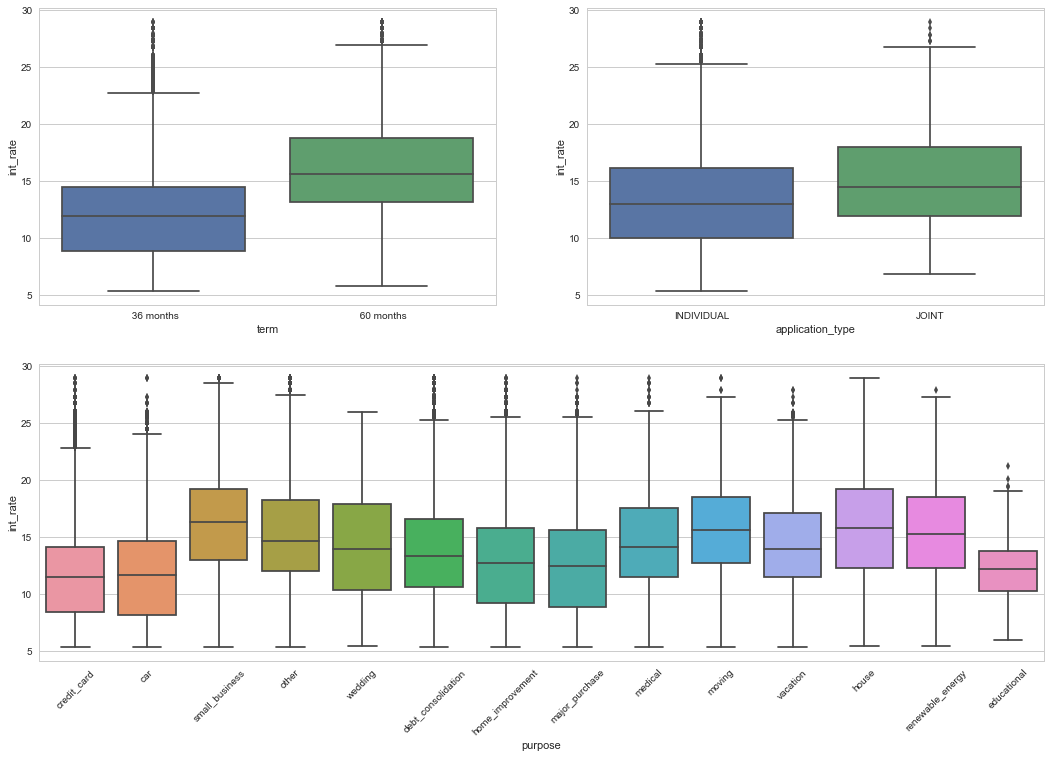

In [23]:
fig = plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.boxplot(x='term', y='int_rate', data=loans_data)
plt.subplot(2,2,2)
sns.boxplot(x='application_type', y='int_rate', data=loans_data)
plt.subplot(2,1,2)
sns.boxplot(x='purpose', y='int_rate', data=loans_data)
plt.xticks(rotation=45)

plt.show()

There are 3 subplots displayed above to show the relationship between interest rate and other attributes. 

Plot1: This plot shows how the 60 months term has more interest rate than the 36 months. The interest rate increases with the term length.

Plot2: This plot shows how the application type affects the interest rate. The join application type has higher interest rate as compared to the individual application type.

Plot3: This plot shows the interest rate across various reasons for which the loan was issued and we see that 'small_business' loans and 'house' loans have the highest interest rate.


### Status Class by Interest rate / Loan Amount

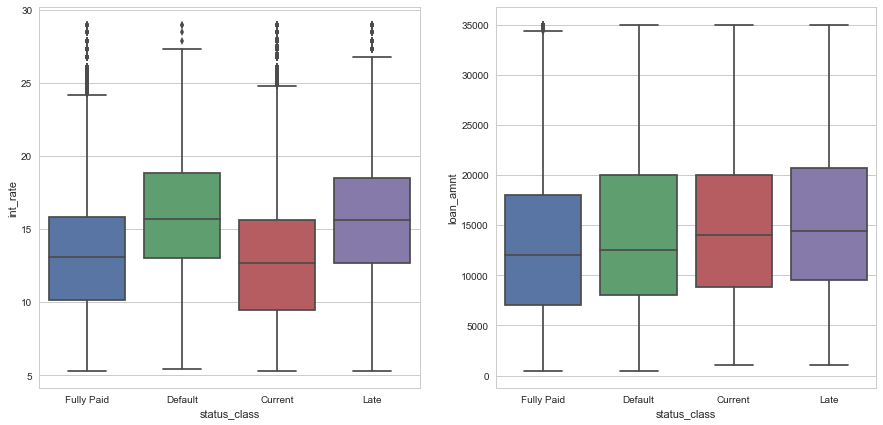

In [24]:
fig= plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.boxplot(x='status_class', y='int_rate', data=loans_data)
plt.subplot(1,2,2)
sns.boxplot(x='status_class', y='loan_amnt', data=loans_data)
plt.show()

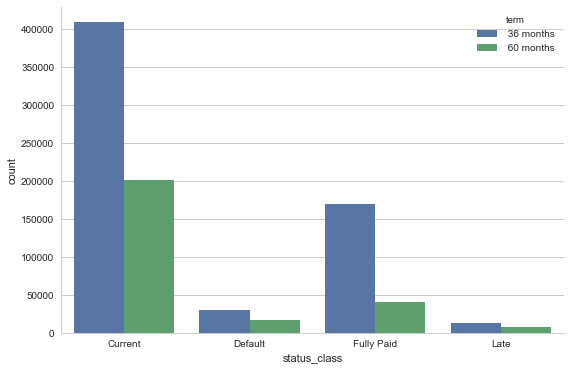

In [25]:
sns.countplot(x='status_class', hue = 'term',data = loans_data , order = ['Current','Default','Fully Paid', 'Late'])
sns.set_style("white")
sns.despine()

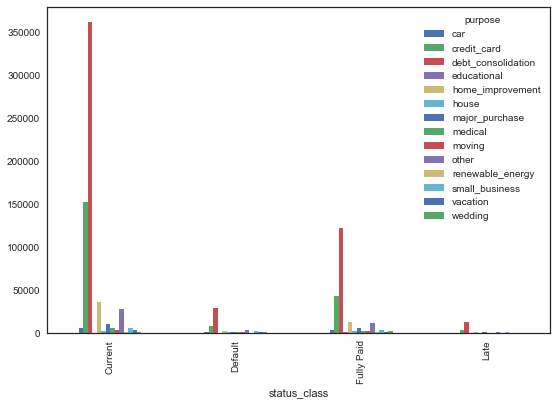

In [26]:
###I need to remove this one, didnt make much sense. Too many colors, too much going on.

loans_data.groupby(['status_class','purpose']).size().unstack().plot(kind='bar')

In [27]:
print(spearmanr(np.array(loans_data['annual_inc']), np.array(loans_data['int_rate'])))

SpearmanrResult(correlation=-0.12283016151685712, pvalue=0.0)


In [28]:
print(spearmanr(np.array(loans_data['loan_amnt']), np.array(loans_data['int_rate'])))

SpearmanrResult(correlation=0.11682878764555998, pvalue=0.0)


### Understanding Credit Grade

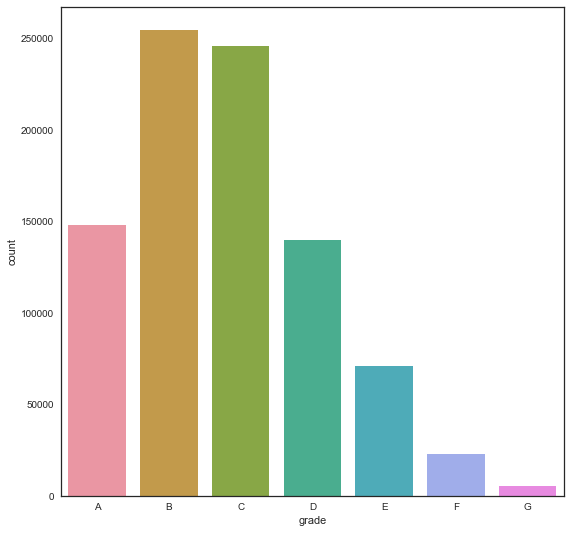

In [29]:
fig = plt.figure(figsize=(9,9))
sns.countplot(loans_data['grade'], order = ('A','B','C','D','E','F','G'))

Converting credit grade into a numberical value in order to use it as a feature later.

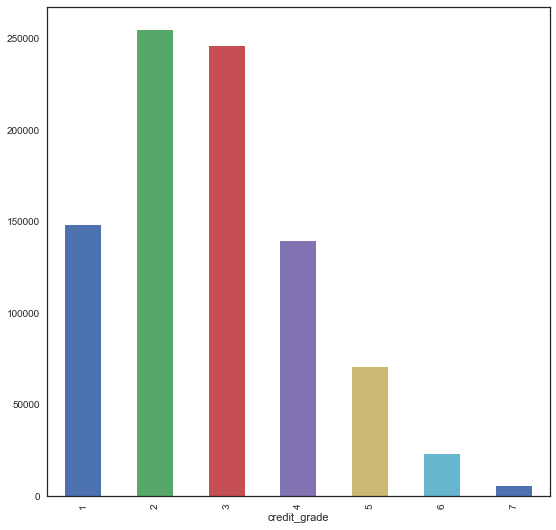

In [30]:
plt.rcParams['figure.figsize'] = (9,9)
def credit_grade(text):
    if text=='A':
        return 1
    elif text == 'B':
        return 2
    elif text == 'C':
        return 3
    elif text == 'D':
        return 4
    elif text == 'E':
        return 5
    elif text == 'F':
        return 6
    elif text == 'G':
        return 7
    else:
        return 99

loans_data['credit_grade']=loans_data['grade'].apply(credit_grade)
loans_data.groupby('credit_grade').size().plot(kind='bar')

### Interest Rate by Grade

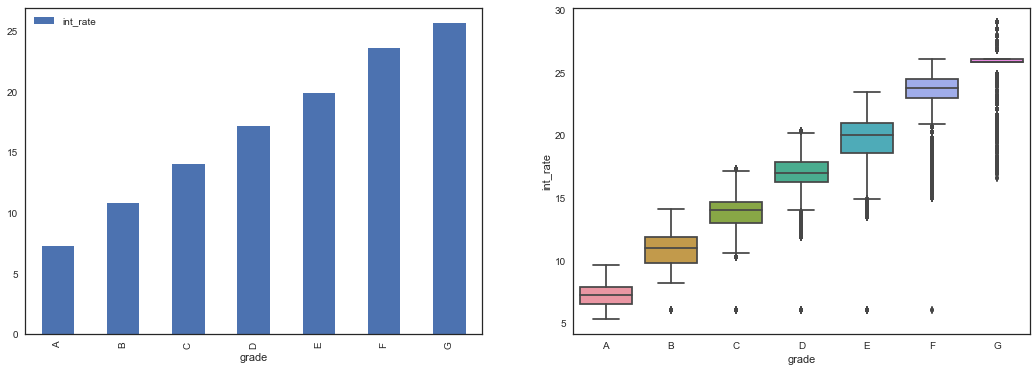

In [31]:
fig, axs = plt.subplots(1,2,figsize=(18,6))
loans_data[['grade','int_rate']].groupby('grade').mean().plot(kind='bar', ax=axs[0])
sns.boxplot(x='grade', y='int_rate', data=loans_data, order = 'ABCDEFG', ax=axs[1])
plt.show()

In [32]:
#loans which are fully paid
loans_data_fp = loans_data[loans_data['status_class']=='Fully Paid']

#loans which defaulted

loans_data_d = loans_data[loans_data['status_class']=='Default']

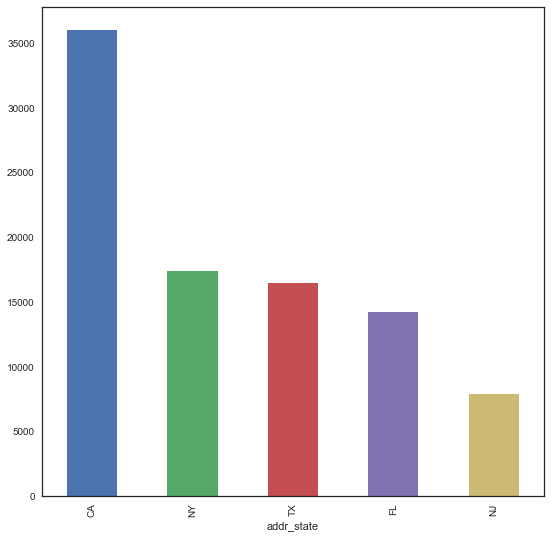

In [33]:
# I use -= in the beginning to ensure that the matplotlibv line does not get printed
_=loans_data_fp[['id','addr_state']].groupby(['addr_state'])['id'].count().nlargest(5).plot(kind='bar')

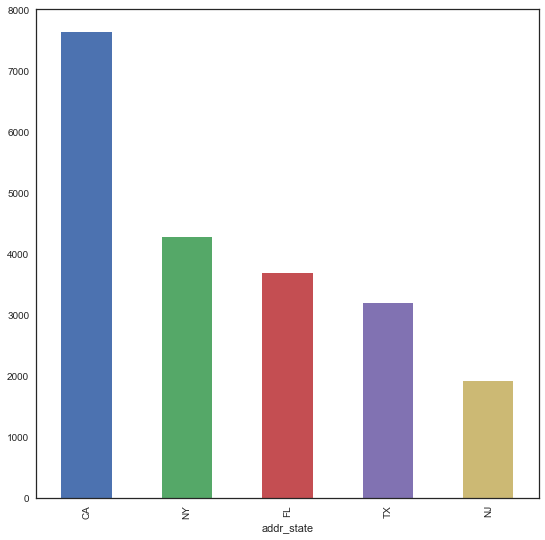

In [34]:
_=loans_data_d[['id','addr_state']].groupby(['addr_state'])['id'].count().nlargest(5).plot(kind='bar')

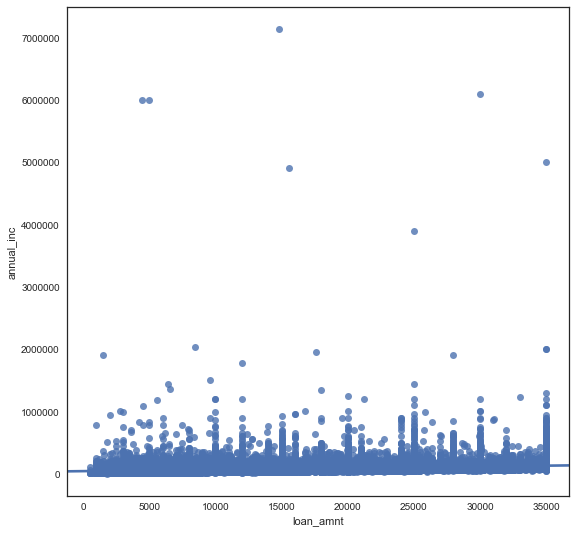

In [35]:
_=sns.regplot('loan_amnt','annual_inc', data = loans_data_fp)

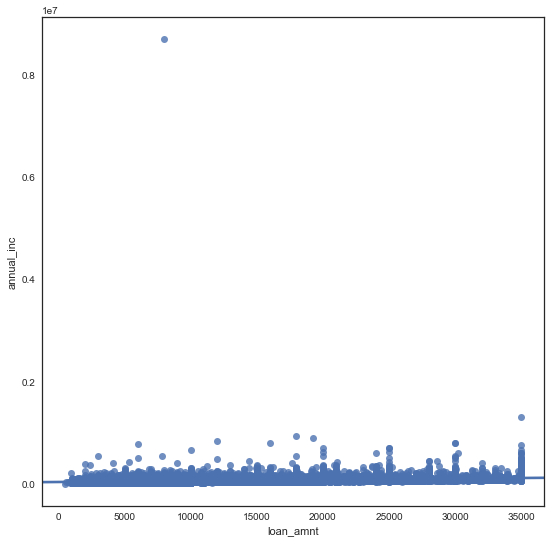

In [36]:
_=sns.regplot('loan_amnt','annual_inc', data = loans_data_d)

### Is there a significant difference between the annual income of Fully Paid and Default loans?

Let's find the mean and median of annual income

In [37]:
print('Median annual income is {0} and Mean annual income is {1}'.format(loans_data['annual_inc'].median(), loans_data['annual_inc'].mean()))

Median annual income is 65000.0 and Mean annual income is 75027.54255984195


In [38]:
len(loans_data_fp), len(loans_data_d)

(209711, 47228)

We had partitioned our dataframe into two separate dataframes based on loan status. Since the sample sizes for both dataframes are greater than 30, this implies Central Limit Theorem holds and we can apply z-statistics.

In [39]:
fp_annual_inc = loans_data_fp['annual_inc']
d_annual_inc = loans_data_d['annual_inc']

In [40]:
fp_mean = fp_annual_inc.mean()
fp_std = fp_annual_inc.std()

print("Mean of annual income for fully paid loans: %s" %fp_mean)
print("Standard deiviation of annual income for fully paid loans: %s" %fp_std)

Mean of annual income for fully paid loans: 74142.5024192341
Standard deiviation of annual income for fully paid loans: 59205.29202398379


In [41]:
d_mean = d_annual_inc.mean()
d_std = d_annual_inc.std()

print("Mean of annual income for defaulted loans: %s" %d_mean)
print("Standard deiviation of annual income for defaulted loans: %s" %d_std)

Mean of annual income for defaulted loans: 65199.76680867284
Standard deiviation of annual income for defaulted loans: 56955.15545104668


From the above calculations, it can be seen that the mean and the standard deviations of fully paid and default loans differ slightly. The next step is to determine if this difference is a statistically significant one.

For hypothesis testing, the following are defined:

- Null Hypothesis: The mean annual income for fully paid and default loans is the same.
- Alternate Hypothesis: The mean annual income for fully paid and default loans is not the same.

The threshold value of $\alpha$ is assumed to be 0.05. Assuming Null Hypothesis is true

In [42]:
h0_mean = 0
mean_diff = fp_mean - d_mean
sigma_diff = np.sqrt((fp_std**2)/len(fp_annual_inc)  + (d_std**2)/len(d_annual_inc))
mean_diff, sigma_diff

(8942.735610561256, 292.23360521799054)

In [43]:
z = (mean_diff - h0_mean) / sigma_diff
z

30.601325278420518

In [44]:
p = (1-stats.norm.cdf(z))*2
p

0.0

The p-value obtained in this case is 0.0 which is less than the accepted threshold of 0.05.Therefore, we reject the null hypothesis. There is a significant difference in the annual income of fully paid and default loans.

For this test, two-sample test was used as we were trying to compare the means of two different groups. Also, the z-statistic was used as the sample sizes for both groups were greater than 30.

#### Creating our prediction model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

I will be using the following columns as features for my model:
- Loan Amount
- Credit Grade (Column I derived)
- Interest Rate
- Derived Income (Column I derived)
- Derived DTI (Column I derived)
- Installment Income Ratio (Column I derived)

Now, let's split the data into a training and test set.

In [46]:

Xlr, Xtestlr, ylr, ytestlr = train_test_split(loans_data[['loan_amnt','credit_grade','int_rate','derived_income','derived_dti','inst_inc_ratio']].values, 
                                              loans_data.status_class.values,random_state=5)

Define a classifier of type logistic regression and fit the algorithm on your training data.
Once, that is done, we will run the classifier against test data and calculate the accuracy of the model.

In [47]:
clf = LogisticRegression()
# Fit the model on the training data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.6863395614054858



### Tuning the Model

The model has some hyperparameters we can tune for hopefully better performance. For tuning the parameters of your model, you will use a mix of cross-validation and grid search. In Logistic Regression, the most important parameter to tune is the regularization parameter C. Note that the regularization parameter is not always part of the logistic regression model.

The regularization parameter is used to control for unlikely high regression coefficients, and in other cases can be used when data is sparse, as a method of feature selection.

You will now implement some code to perform model tuning and selecting the regularization parameter $C$.

We use the following cv_score function to perform K-fold cross-validation and apply a scoring function to each test fold. In this incarnation we use accuracy score as the default scoring function.


In [48]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

Below is an example of using the cv_score function for a basic logistic regression model without regularization.

In [49]:
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print(score)

0.6881767119242259


Let's take a grid of parameters to search over

In [50]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

from sklearn.linear_model import LogisticRegression

max_score = 0

for c in Cs:
    clf = LogisticRegression(C=c)
    score = cv_score(clf, Xlr, ylr)
    
    if score > max_score:
        max_score = score
        best_c = c
print (max_score, best_c)

0.6882247935427733 10


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clfl = LogisticRegression(C=best_c)
clfl.fit(Xlr, ylr)
ypred = clfl.predict(Xtestlr)
print(accuracy_score(ypred,ytestlr))

0.6863260384502693


### Black Box Grid Search in sklearn
Scikit-learn, as with many other Python packages, provides utilities to perform common operations so you do not have to do it manually. It is important to understand the mechanics of each operation, but at a certain point, you will want to use the utility instead to save time...

In [53]:
from sklearn.grid_search import GridSearchCV

clfl2 = LogisticRegression()
parameters = {"C":[0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfl2,param_grid = parameters, cv = 5, scoring = 'accuracy')
fitmodel.fit(Xlr, ylr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


(LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 {'C': 0.001},
 0.6881932403152957,
 [mean: 0.68819, std: 0.00005, params: {'C': 0.001},
  mean: 0.68817, std: 0.00004, params: {'C': 0.1},
  mean: 0.68819, std: 0.00004, params: {'C': 1},
  mean: 0.68818, std: 0.00005, params: {'C': 10},
  mean: 0.68818, std: 0.00005, params: {'C': 100}])

Above, we noticed that with blackbox grid search we get a different value of C and different accuracy as well. 

Let's check if the model performs better or consistently on test set

In [54]:
clfl3 = LogisticRegression(C=fitmodel.best_params_['C'])
clfl3.fit(Xlr, ylr)
ypred = clfl3.predict(Xtestlr)
accuracy_score(ypred,ytestlr)

0.6863260384502693

In [55]:
print("\n")
print("Xlr:", Xlr, type(Xlr), Xlr.shape, len(Xlr)) #TrainX

print("\n")
print("Xtestlr", Xtestlr, type(Xtestlr), Xtestlr.shape, len(Xtestlr)) #TestX

print("\n")
print("ylr", ylr, type(ylr), ylr.shape, len(ylr)) #Trainy

print("\n")
print("ytestlr", ytestlr, type(ytestlr), ytestlr.shape, len(ytestlr)) #Testy

#By default train_test_split splits to 75% train and 25% test
#Random state set to a fixed number wil guarantee 
#that the output of Run 1 will be equal to the output of Run 2, 
#i.e. your split will be always the same

#Construct the LogisticRegression model
clf = LogisticRegression()


# Fit the model on the training data.
clf.fit(Xlr, ylr) 

# Print the accuracy from the testing data.
# Introduce variable to be reused later, predicting y using test set
y_predict_test = clf.predict(Xtestlr)
print("\n")
#Here we compare the value of y_predict_test that we get with ytestlr values that we already have.
print("[Test] Accuracy score (y_predict_test, ytestlr):",accuracy_score(y_predict_test, ytestlr))

# Note the order in which the parameters must be passed
# according to the documentation ... although there should be
# no difference since it is a one-to-one comparison ...
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
print("\n")
print("[Test] Accuracy score: (ytestlr, y_predict_test)",accuracy_score(ytestlr, y_predict_test))

# Also printout the training score
y_predict_training = clf.predict(Xlr)
print("\n")
print("[Training] Accuracy score: (ylr, y_predict_training)",accuracy_score(ylr, y_predict_training))




Xlr: [[7.50000000e+03 2.00000000e+00 1.09900000e+01 4.20000000e+04
  1.26300000e+01 7.01457143e-02]
 [2.30750000e+04 3.00000000e+00 1.22900000e+01 6.00000000e+04
  3.05800000e+01 1.03336000e-01]
 [3.02250000e+04 3.00000000e+00 1.53100000e+01 8.44000000e+04
  2.66900000e+01 1.49624645e-01]
 ...
 [1.50000000e+04 3.00000000e+00 1.31800000e+01 6.70000000e+04
  1.65100000e+01 9.07558209e-02]
 [7.12500000e+03 1.00000000e+00 5.79000000e+00 2.61240000e+04
  2.66300000e+01 9.92558567e-02]
 [3.20000000e+04 3.00000000e+00 1.39800000e+01 2.48000000e+05
  1.45700000e+01 5.29054839e-02]] <class 'numpy.ndarray'> (665534, 6) 665534


Xtestlr [[6.00000000e+03 5.00000000e+00 2.24000000e+01 4.70000000e+04
  2.01200000e+01 5.88229787e-02]
 [5.50000000e+03 2.00000000e+00 1.31100000e+01 4.40000000e+04
  7.91000000e+00 5.06209091e-02]
 [8.00000000e+03 2.00000000e+00 1.23500000e+01 7.00000000e+04
  9.82000000e+00 4.57817143e-02]
 ...
 [8.20000000e+03 3.00000000e+00 1.29900000e+01 5.20000000e+04
  1.46800000

### Notes:
It is common practice to show--when applicable--performance metrics for both the training set and the test set. This means that the model is fitted with the training set, and once fitted, predictions are generated using the training set and the test set, and the corresponding performance metrics are shown (as above), and analyzed (see below.)

Model's training accuracy is pretty good when it's very close to 1--or 100% then one says there is no "bias" in the model, in our case it's decent enough.

Since the model's test accuracy is pretty close to the training accuracy, then one says that there is no "variance" between the training accuracy and the test accuracy. This is an indication that the model will "generalize well", which means that the model will be well-behaved when new data.

These two properties are important and desirable.

When the training accuracy is good, and the test accuracy is not close to the training accuracy (in the sense that the former is worse), then one says the model is "overfitting" the training set. In this case, there is no overfitting. When there is evidence of overfitting, one must analyze the situation and suggest the course of action, typically aimed at "relaxing" the model--i.e., making it less strict.

Typically, the test accuracy, even when it is close to the training accuracy, tends to be smaller (worse) than the training accuracy (better).

When the test accuracy is significally better than the training accuracy, this would justify a review of the code to see if there is a bug. Plotting the performance results with multiple splits of the same kind would also be a good idea.

The code below shows one simple way to do it.

In [ ]:
# We try multiple splits and see the effects, with the same proportion 75% train and 25% test

# keep lists for training accuracy, test accuracy, and the difference between the latter and the former
training_accuracy = []
test_accuracy = []
accuracy_difference = []

# define number of trials
n_splits = 1000

# define LogisticRegression object
clf = LogisticRegression()

# loop over multiple trials
for i in range(0, n_splits):
    # do split for this iteration, using shuffle and a different random_state 
    # for every iteration    
    Xlr, Xtestlr, ylr, ytestlr = train_test_split(loans_data[['loan_amnt','credit_grade','int_rate','derived_income','derived_dti','inst_inc_ratio']].values, 
                                              loans_data.status_class.values,random_state=i)
    # fit on the training set
    clf.fit(Xlr, ylr)
    
    # predict on training set
    y_predict_training = clf.predict(Xlr)
    
    # predict on test set
    y_predict_test = clf.predict(Xtestlr)
    
    # save training accuracy for this split
    tr_accuracy = accuracy_score(y_predict_training, ylr)
    training_accuracy.append(tr_accuracy)
    
    # save test accuracy for this split
    tst_accuracy = accuracy_score(y_predict_test, ytestlr)
    test_accuracy.append(tst_accuracy)
    
    # save difference
    accuracy_difference.append(tst_accuracy - tr_accuracy)
#end for

# plot both curves
# ref: https://matplotlib.org/users/pyplot_tutorial.html
# parameter alpha below is a percentage of transparency
# ref: https://matplotlib.org/users/legend_guide.html
training_plot, = plt.plot(training_accuracy, 'b')
test_plot, = plt.plot(test_accuracy, 'r', alpha = 0.35=
plt.legend([training_plot, test_plot], ['Training Accuracy', 'Test Accuracy'])
plt.ylabel('Training vs Test Accuracy')
plt.show()

In [ ]:
# Show accuracy difference plot
diff_plot, = plt.plot(accuracy_difference, 'y')
plt.legend([diff_plot], ['Difference'])
plt.ylabel('Test/Training Difference Accuracy')
plt.show()